In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Setting the current working directory
import os; os.chdir('drive/My Drive/Colab Notebooks')

<a id='import'></a>
### Import Packages

In [3]:
# Imports
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, h5py
import matplotlib.style as style; style.use('fivethirtyeight')
%matplotlib inline

# Metrics and preprocessing
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# TF and Keras
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

# Checking if GPU is found
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

tf.reset_default_graph()
tf.set_random_seed(42)

Found GPU at: /device:GPU:0


<a id='load'></a>
### Load train, val and test datasets from h5py file

In [5]:
# Read the h5 file
h5_SVH = h5py.File('SVHN_single_grey1.h5', 'r')

# Load the training, validation and test sets
X_train = h5_SVH['X_train'][:]
y_train_o = h5_SVH['y_train'][:]
X_val = h5_SVH['X_val'][:]
y_val_o = h5_SVH['y_val'][:]
X_test = h5_SVH['X_test'][:]
y_test_o = h5_SVH['y_test'][:]

# Close this file

h5_SVH.close()

print('Training set', X_train.shape, y_train_o.shape)
print('Validation set', X_val.shape, y_val_o.shape)
print('Test set', X_test.shape, y_test_o.shape)

print('\n')
print('Unique labels in y_train :', np.unique(y_train_o))
print('Unique labels in y_val   :', np.unique(y_val_o))
print('Unique labels in y_test  :', np.unique(y_test_o))

Training set (42000, 32, 32) (42000,)
Validation set (60000, 32, 32) (60000,)
Test set (18000, 32, 32) (18000,)


Unique labels in y_train : [0 1 2 3 4 5 6 7 8 9]
Unique labels in y_val   : [0 1 2 3 4 5 6 7 8 9]
Unique labels in y_test  : [0 1 2 3 4 5 6 7 8 9]


<a id='o1'></a>
#### Observation 1 - Sets Shape
* Length of training sets: 42k, validation sets: 60k, test sets: 18k
* Size of the images: 32*32
* Number of class: 10

<a id='visualize'></a>
### Visualizing first 10 images

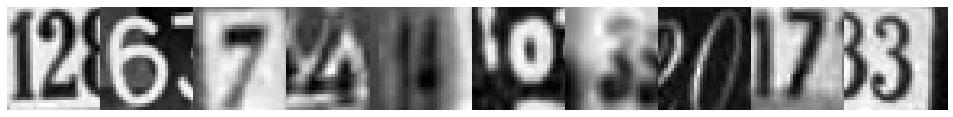

Label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [6]:
# Visualizing first 10 images in the dataset and their labels
plt.figure(figsize = (15, 4.5))
for i in range(10):  
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape((32, 32)),cmap = plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace = -0.1, hspace = -0.1)
plt.show()

print('Label for each of the above image: %s' % (y_train_o[0 : 10]))

Checking first image and label in training set
--------------------------------------------------------------------------------


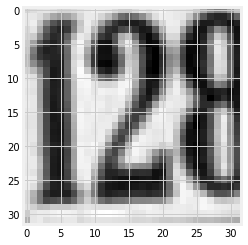

Label: 2


In [7]:
print('Checking first image and label in training set'); print('--'*40)
plt.imshow(X_train[0], cmap = plt.cm.binary)    
plt.show()
print('Label:', y_train_o[0])

Checking first image and label in validation set
--------------------------------------------------------------------------------


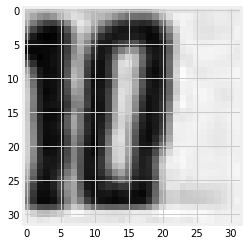

Label: 0


In [8]:
print('Checking first image and label in validation set'); print('--'*40)
plt.imshow(X_val[0], cmap = plt.cm.binary)    
plt.show()
print('Label:', y_val_o[0])

Checking first image and label in test set
--------------------------------------------------------------------------------


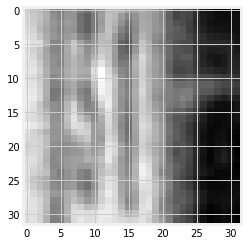

Label: 1


In [9]:
print('Checking first image and label in test set'); print('--'*40)
plt.imshow(X_test[0], cmap = plt.cm.binary)    
plt.show()
print('Label:', y_test_o[0])

<a id='flatten'></a>
### Flatten and normalize the images for Keras

In [10]:
print('Reshaping X data: (n, 32, 32) => (n, 1024)'); print('--'*40)
X_train = X_train.reshape((X_train.shape[0], -1))
X_val = X_val.reshape((X_val.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

print('Making sure that the values are float so that we can get decimal points after division'); print('--'*40)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

print('Normalizing the RGB codes by dividing it to the max RGB value'); print('--'*40)
X_train /= 255
X_val /= 255
X_test /= 255

print('Converting y data into categorical (one-hot encoding)'); print('--'*40)
y_train = to_categorical(y_train_o)
y_val = to_categorical(y_val_o)
y_test = to_categorical(y_test_o)

Reshaping X data: (n, 32, 32) => (n, 1024)
--------------------------------------------------------------------------------
Making sure that the values are float so that we can get decimal points after division
--------------------------------------------------------------------------------
Normalizing the RGB codes by dividing it to the max RGB value
--------------------------------------------------------------------------------
Converting y data into categorical (one-hot encoding)
--------------------------------------------------------------------------------


In [11]:
print('X_train shape:', X_train.shape)
print('X_val shape:', X_val.shape)
print('X_test shape:', X_test.shape)

print('\n')
print('y_train shape:', y_train.shape)
print('y_val shape:', y_val.shape)
print('y_test shape:', y_test.shape)

print('\n')
print('Number of images in X_train', X_train.shape[0])
print('Number of images in X_val', X_val.shape[0])
print('Number of images in X_test', X_test.shape[0])

X_train shape: (42000, 1024)
X_val shape: (60000, 1024)
X_test shape: (18000, 1024)


y_train shape: (42000, 10)
y_val shape: (60000, 10)
y_test shape: (18000, 10)


Number of images in X_train 42000
Number of images in X_val 60000
Number of images in X_test 18000


<a id='Baby'></a>
### Modelling - Baby sitting the learning process

#### Fully connected linear layer

In [0]:
class Linear():
    def __init__(self, in_size, out_size):
        self.W = np.random.randn(in_size, out_size) * 0.01
        self.b = np.zeros((1, out_size))
        self.params = [self.W, self.b]
        self.gradW = None
        self.gradB = None
        self.gradInput = None        

    def forward(self, X):
        self.X = X
        self.output = np.dot(X, self.W) + self.b
        return self.output

    def backward(self, nextgrad):
        self.gradW = np.dot(self.X.T, nextgrad)
        self.gradB = np.sum(nextgrad, axis=0)
        self.gradInput = np.dot(nextgrad, self.W.T)
        return self.gradInput, [self.gradW, self.gradB]

#### ReLU

In [0]:
class ReLU():
    def __init__(self):
        self.params = []
        self.gradInput = None

    def forward(self, X):
        self.output = np.maximum(X, 0)
        return self.output

    def backward(self, nextgrad):
        self.gradInput = nextgrad.copy()
        self.gradInput[self.output <=0] = 0
        return self.gradInput, []

#### Softmax function

In [0]:
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

#### Cross entropy loss

In [0]:
class CrossEntropy:
    def forward(self, X, y):
        self.m = y.shape[0]
        self.p = softmax(X)
        cross_entropy = -np.log(self.p[range(self.m), y]+1e-16)
        loss = np.sum(cross_entropy) / self.m
        return loss
    
    def backward(self, X, y):
        y_idx = y.argmax()        
        grad = softmax(X)
        grad[range(self.m), y] -= 1
        grad /= self.m
        return grad

#### NN class that enables the forward prop and backward propagation of the entire network

In [0]:
class NN():
    def __init__(self, lossfunc = CrossEntropy(), mode = 'train'):
        self.params = []
        self.layers = []
        self.loss_func = lossfunc
        self.grads = []
        self.mode = mode
        
    def add_layer(self, layer):
        self.layers.append(layer)
        self.params.append(layer.params)

    def forward(self, X):
        for layer in self.layers:
            X = layer.forward(X)
        return X
    
    def backward(self, nextgrad):
        self.clear_grad_param()
        for layer in reversed(self.layers):
            nextgrad, grad = layer.backward(nextgrad)
            self.grads.append(grad)
        return self.grads
    
    def train_step(self, X, y):
        out = self.forward(X)
        loss = self.loss_func.forward(out,y)
        nextgrad = self.loss_func.backward(out,y)
        grads = self.backward(nextgrad)
        return loss, grads
    
    def predict(self, X):
        X = self.forward(X)
        p = softmax(X)
        return np.argmax(p, axis=1)
    
    def predict_scores(self, X):
        X = self.forward(X)
        p = softmax(X)
        return p
    
    def clear_grad_param(self):
        self.grads = []

#### Update function SGD with momentum

In [0]:
def update(velocity, params, grads, learning_rate=0.01, mu=0.9):
    for v, p, g, in zip(velocity, params, reversed(grads)):
        for i in range(len(g)):
            v[i] = (mu * v[i]) - (learning_rate * g[i])
            p[i] += v[i]

#### Get minibatches

In [0]:
def minibatch(X, y, minibatch_size):
    n = X.shape[0]
    minibatches = []
    permutation = np.random.permutation(X.shape[0])
    X = X[permutation]
    y = y[permutation]
    
    for i in range(0, n , minibatch_size):
        X_batch = X[i:i + minibatch_size, :]
        y_batch = y[i:i + minibatch_size, ]
        minibatches.append((X_batch, y_batch))
        
    return minibatches

#### The training loop

In [0]:
def train(net, X_train, y_train, minibatch_size, epoch, learning_rate, mu = 0.9, X_val = None, y_val = None, Lambda = 0, verb = True):
    val_loss_epoch = []
    minibatches = minibatch(X_train, y_train, minibatch_size)
    minibatches_val = minibatch(X_val, y_val, minibatch_size)
    
    for i in range(epoch):
        loss_batch = []
        val_loss_batch = []
        velocity = []
        for param_layer in net.params:
            p = [np.zeros_like(param) for param in list(param_layer)]
            velocity.append(p)
            
        # iterate over mini batches
        for X_mini, y_mini in minibatches:
            loss, grads = net.train_step(X_mini, y_mini)
            loss_batch.append(loss)
            update(velocity, net.params, grads, learning_rate=learning_rate, mu=mu)

        for X_mini_val, y_mini_val in minibatches_val:
            val_loss, _ = net.train_step(X_mini, y_mini)
            val_loss_batch.append(val_loss)
        
        # accuracy of model at end of epoch after all mini batch updates
        m_train = X_train.shape[0]
        m_val = X_val.shape[0]
        y_train_pred = []
        y_val_pred = []
        y_train1 = []
        y_vall = []
        for ii in range(0, m_train, minibatch_size):
            X_tr = X_train[ii:ii + minibatch_size, : ]
            y_tr = y_train[ii:ii + minibatch_size,]
            y_train1 = np.append(y_train1, y_tr)
            y_train_pred = np.append(y_train_pred, net.predict(X_tr))

        for ii in range(0, m_val, minibatch_size):
            X_va = X_val[ii:ii + minibatch_size, : ]
            y_va = y_val[ii:ii + minibatch_size,]
            y_vall = np.append(y_vall, y_va)
            y_val_pred = np.append(y_val_pred, net.predict(X_va))
            
        train_acc = check_accuracy(y_train1, y_train_pred)
        val_acc = check_accuracy(y_vall, y_val_pred)
        
        ## weights
        w = np.array(net.params[0][0])
        
        ## adding regularization to cost
        mean_train_loss = (sum(loss_batch) / float(len(loss_batch)))
        mean_val_loss = sum(val_loss_batch) / float(len(val_loss_batch))
        
        val_loss_epoch.append(mean_val_loss)
        if verb:
            if i%50==0:
                print("Epoch {3}/{4}: Loss = {0} | Training Accuracy = {1}".format(mean_train_loss, train_acc, val_acc, i, epoch))
    return net, val_acc

#### Checking the accuracy of the model

In [0]:
def check_accuracy(y_true, y_pred):
    return np.mean(y_pred == y_true)

#### Invoking all that we have created until now

In [0]:
# Invoking the model
## input size
input_dim = X_train.shape[1]

def train_and_test_loop(iterations, lr, Lambda, verb = True):
    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes1 = 10
    output_nodes = 10

    ## define neural net
    nn = NN()
    nn.add_layer(Linear(input_dim, hidden_nodes1))

    nn, val_acc = train(nn, X_train, y_train_o, minibatch_size = 200, epoch = iterations, learning_rate = learning_rate,\
                      X_val = X_test, y_val = y_test_o, Lambda = Lambda, verb = verb)
    return val_acc

#### Double Check that the loss is reasonable : Disable the regularization

In [22]:
lr = 0.00001
Lambda = 0
train_and_test_loop(1, lr, Lambda)

Epoch 0/1: Loss = 2.309373743409679 | Training Accuracy = 0.09297619047619048


0.09216666666666666

#### Now, lets crank up the Lambda(Regularization) and check what it does to our loss function

In [23]:
lr = 0.00001
Lambda = 1e3
train_and_test_loop(1, lr, Lambda)

Epoch 0/1: Loss = 2.3119503381058504 | Training Accuracy = 0.10057142857142858


0.10316666666666667

#### Now, lets overfit to a small subset of our dataset, in this case 20 images

In [24]:
X_train_subset = X_train[0:20]
y_train_subset = y_train_o[0:20]

X_train = X_train_subset
y_train_o = y_train_subset

X_train.shape, y_train_o.shape

((20, 1024), (20,))

#### Make sure that you can overfit very small portion of the training data
So, set a small learning rate and turn regularization off
In the code below:
* Take the first 20 examples
* turn off regularization(reg=0.0)
* use simple vanilla 'sgd'

In [25]:
%time
lr = 0.001
Lambda = 0
train_and_test_loop(5000, lr, Lambda)

CPU times: user 6 µs, sys: 2 µs, total: 8 µs
Wall time: 8.11 µs
Epoch 0/5000: Loss = 2.2912052054756744 | Training Accuracy = 0.2
Epoch 50/5000: Loss = 1.9326575049595554 | Training Accuracy = 0.25
Epoch 100/5000: Loss = 1.8482099256335585 | Training Accuracy = 0.35
Epoch 150/5000: Loss = 1.7943376433438991 | Training Accuracy = 0.35
Epoch 200/5000: Loss = 1.7496415711149464 | Training Accuracy = 0.5
Epoch 250/5000: Loss = 1.709425690282347 | Training Accuracy = 0.5
Epoch 300/5000: Loss = 1.6720401663002735 | Training Accuracy = 0.5
Epoch 350/5000: Loss = 1.6367355519905478 | Training Accuracy = 0.5
Epoch 400/5000: Loss = 1.6031114234034636 | Training Accuracy = 0.55
Epoch 450/5000: Loss = 1.5709261368685572 | Training Accuracy = 0.55
Epoch 500/5000: Loss = 1.5400184464453295 | Training Accuracy = 0.55
Epoch 550/5000: Loss = 1.5102714307411595 | Training Accuracy = 0.55
Epoch 600/5000: Loss = 1.4815945100541206 | Training Accuracy = 0.6
Epoch 650/5000: Loss = 1.453913869536486 | Traini

0.13677777777777778

#### Loading the original dataset again

In [26]:
h5_SVH = h5py.File('SVHN_single_grey1.h5', 'r')
# Load the training, validation and test sets
X_train = h5_SVH['X_train'][:]
y_train_o = h5_SVH['y_train'][:]
X_val = h5_SVH['X_val'][:]
y_val_o = h5_SVH['y_val'][:]
X_test = h5_SVH['X_test'][:]
y_test_o = h5_SVH['y_test'][:]

print('Reshaping X data: (n, 32, 32) => (n, 1024)'); print('--'*40)
X_train = X_train.reshape((X_train.shape[0], -1))
X_val = X_val.reshape((X_val.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

print('Making sure that the values are float so that we can get decimal points after division'); print('--'*40)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

print('Normalizing the RGB codes by dividing it to the max RGB value'); print('--'*40)
X_train /= 255
X_val /= 255
X_test /= 255

print('Converting y data into categorical (one-hot encoding)'); print('--'*40)
y_train = to_categorical(y_train_o)
y_val = to_categorical(y_val_o)
y_test = to_categorical(y_test_o)

Reshaping X data: (n, 32, 32) => (n, 1024)
--------------------------------------------------------------------------------
Making sure that the values are float so that we can get decimal points after division
--------------------------------------------------------------------------------
Normalizing the RGB codes by dividing it to the max RGB value
--------------------------------------------------------------------------------
Converting y data into categorical (one-hot encoding)
--------------------------------------------------------------------------------


#### Start with small regularization and find learning rate that makes the loss go down.
* we start with Lambda(small regularization) = 1e-7
* we start with a small learning rate = 1e-7

In [27]:
lr = 1e-7
Lambda = 1e-7
train_and_test_loop(500, lr, Lambda)

Epoch 0/500: Loss = 2.313636055830537 | Training Accuracy = 0.10047619047619048
Epoch 50/500: Loss = 2.3098854192808265 | Training Accuracy = 0.10071428571428571
Epoch 100/500: Loss = 2.307415493568172 | Training Accuracy = 0.10316666666666667
Epoch 150/500: Loss = 2.3057910045718257 | Training Accuracy = 0.10704761904761904
Epoch 200/500: Loss = 2.3047235654049802 | Training Accuracy = 0.10909523809523809
Epoch 250/500: Loss = 2.304022015886695 | Training Accuracy = 0.1105
Epoch 300/500: Loss = 2.3035599597681045 | Training Accuracy = 0.11019047619047619
Epoch 350/500: Loss = 2.3032541306688623 | Training Accuracy = 0.10907142857142857
Epoch 400/500: Loss = 2.3030498914481656 | Training Accuracy = 0.10919047619047619
Epoch 450/500: Loss = 2.302911526056488 | Training Accuracy = 0.10861904761904762


0.10733333333333334

#### Lets try to train now with a value of learning rate 0.001

In [28]:
lr = 0.001
Lambda = 1e-7
train_and_test_loop(500, lr, Lambda)

Epoch 0/500: Loss = 2.304716830397155 | Training Accuracy = 0.1029047619047619
Epoch 50/500: Loss = 2.2593131034088025 | Training Accuracy = 0.20676190476190476
Epoch 100/500: Loss = 2.2508055885871188 | Training Accuracy = 0.2173095238095238
Epoch 150/500: Loss = 2.2464950595129447 | Training Accuracy = 0.22304761904761905
Epoch 200/500: Loss = 2.243615003186904 | Training Accuracy = 0.22583333333333333
Epoch 250/500: Loss = 2.24145019171443 | Training Accuracy = 0.2287857142857143


KeyboardInterrupt: ignored

#### Hyperparameter Optimization



#### Running a finer search

In [29]:
import math
for k in range(1, 10):
    lr = math.pow(10, np.random.uniform(-3.0, -2.0))
    Lambda = math.pow(10, np.random.uniform(-5, 2))
    best_acc = train_and_test_loop(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 10, best_acc, lr, Lambda))

Try 1/10: Best_val_acc: 0.20077777777777778, lr: 0.0015152323209262192, Lambda: 2.420088513058786

Try 2/10: Best_val_acc: 0.1995, lr: 0.0030309330192900014, Lambda: 0.005383061454363937

Try 3/10: Best_val_acc: 0.2065, lr: 0.0012797477597798065, Lambda: 10.3755728511842

Try 4/10: Best_val_acc: 0.20005555555555554, lr: 0.004519064979439422, Lambda: 33.89483252747831

Try 5/10: Best_val_acc: 0.2011111111111111, lr: 0.005815733096986648, Lambda: 4.509999539600583e-05

Try 6/10: Best_val_acc: 0.18733333333333332, lr: 0.005783968170324197, Lambda: 0.6858952147621221

Try 7/10: Best_val_acc: 0.2021111111111111, lr: 0.0017842001687856277, Lambda: 0.00021786260784602122

Try 8/10: Best_val_acc: 0.20822222222222223, lr: 0.0032010583399681015, Lambda: 0.0001013405412068582

Try 9/10: Best_val_acc: 0.20105555555555554, lr: 0.0021921377401540316, Lambda: 0.04994502659125139



##### Observation 2 - Baby sitting the neural network for SVHN
* Best accuracy achieved using this method after hyperparameter optimization: 21%.

<a id='BasicNN'></a>
### Modelling - Neural Network API

#### NN model, sigmoid activations, SGD optimizer

In [30]:
print('NN model with sigmoid activations'); print('--'*40)
# Initialize the neural network classifier
model1 = Sequential()

# Input Layer - adding input layer and activation functions sigmoid
model1.add(Dense(128, input_shape = (1024, )))
# Adding activation function
model1.add(Activation('sigmoid'))

#Hidden Layer 1 - adding first hidden layer
model1.add(Dense(64))
# Adding activation function
model1.add(Activation('sigmoid'))

# Output Layer - adding output layer which is of 10 nodes (digits)
model1.add(Dense(10))
# Adding activation function - softmax for multiclass classification
model1.add(Activation('softmax'))

NN model with sigmoid activations
--------------------------------------------------------------------------------
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [31]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               131200    
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 140,106
Trainable params: 140,106
Non-trainable params: 0
__________________________________________________

In [32]:
# compiling the neural network classifier, sgd optimizer
sgd = optimizers.SGD(lr = 0.01)
model1.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model1.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 3s 74us/sample - loss: 2.3176 - acc: 0.1024 - val_loss: 2.3029 - val_acc: 0.1036
Epoch 2/100
42000/42000 [==============================] - 1s 33us/sample - loss: 2.3032 - acc: 0.0999 - val_loss: 2.3028 - val_acc: 0.1026
Epoch 3/100
42000/42000 [==============================] - 1s 33us/sample - loss: 2.3030 - acc: 0.1005 - val_loss: 2.3031 - val_acc: 0.1010
Epoch 4/100
42000/42000 [==============================] - 1s 33us/sample - loss: 2.3030 - acc: 0.1010 - val_loss: 2.3027 - val_acc: 0.1002
Epoch 5/100
42000/42000 [==============================] - 1s 34us/sample - loss: 2.3029 - acc: 0.1040 - val_loss: 2.3029 - val_acc: 0.0990
Epoch 6/100
42000/42000 [==============================] - 1s 34us/sample - loss: 2.3028 - acc: 0.1000 - val_loss: 2.3027 - val_acc: 0.1041
Epoch 7/100
42000/42000 [==============================] - 1s 33us/sample - loss: 2.3028 - acc: 0.1032 - val_l

In [33]:
print('Evaluate NN model with sigmoid activations'); print('--'*40)
results1 = model1.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results1[1]*100, 2), '%'))

Evaluate NN model with sigmoid activations
--------------------------------------------------------------------------------
60000/60000 [==============================] - 4s 64us/sample - loss: 2.2994 - acc: 0.1175
Validation accuracy: 11.75


#### NN model, sigmoid activations, SGD optimizer, changing learning rate

In [34]:
print('NN model with sigmoid activations - changing learning rate'); print('--'*40)
# compiling the neural network classifier, sgd optimizer
sgd = optimizers.SGD(lr = 0.001)
model1.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model1.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

NN model with sigmoid activations - changing learning rate
--------------------------------------------------------------------------------
Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 2s 36us/sample - loss: 2.2991 - acc: 0.1180 - val_loss: 2.2992 - val_acc: 0.1237
Epoch 2/100
42000/42000 [==============================] - 1s 34us/sample - loss: 2.2990 - acc: 0.1224 - val_loss: 2.2992 - val_acc: 0.1276
Epoch 3/100
42000/42000 [==============================] - 1s 33us/sample - loss: 2.2990 - acc: 0.1294 - val_loss: 2.2992 - val_acc: 0.1280
Epoch 4/100
42000/42000 [==============================] - 1s 33us/sample - loss: 2.2990 - acc: 0.1285 - val_loss: 2.2991 - val_acc: 0.1281
Epoch 5/100
42000/42000 [==============================] - 1s 34us/sample - loss: 2.2990 - acc: 0.1302 - val_loss: 2.2991 - val_acc: 0.1282
Epoch 6/100
42000/42000 [==============================] - 1s 33us/sample - loss: 2.2990 - acc: 0.1299 - val_l

In [35]:
print('Evaluate NN model with sigmoid activations - changing learning rate'); print('--'*40)
results1 = model1.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results1[1]*100, 2), '%'))

Evaluate NN model with sigmoid activations - changing learning rate
--------------------------------------------------------------------------------
60000/60000 [==============================] - 4s 65us/sample - loss: 2.2988 - acc: 0.1300
Validation accuracy: 13.0


<a id='o3'></a>
##### Observation 3 - NN model with sigmoid activations
* Validation score is very low, changing learning rate further reduces it.
* Optimizing the network in order to better learn the patterns in the dataset.
* Best model out of the above is the one with lower learning rate using SGD optimizer and sigmoid activations.
* Next, let's use relu activations and see if the score improves.

#### NN model, relu activations, SGD optimizer

In [36]:
%time
print('NN model with relu activations and sgd optimizers'); print('--'*40)
# Initialize the neural network classifier
model2 = Sequential()

# Input Layer - adding input layer and activation functions relu
model2.add(Dense(128, input_shape = (1024, )))
# Adding activation function
model2.add(Activation('relu'))

#Hidden Layer 1 - adding first hidden layer
model2.add(Dense(64))
# Adding activation function
model2.add(Activation('relu'))

# Output Layer - adding output layer which is of 10 nodes (digits)
model2.add(Dense(10))
# Adding activation function - softmax for multiclass classification
model2.add(Activation('softmax'))

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 9.06 µs
NN model with relu activations and sgd optimizers
--------------------------------------------------------------------------------


In [37]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               131200    
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total params: 140,106
Trainable params: 140,106
Non-trainable params: 0
________________________________________________

In [38]:
# compiling the neural network classifier, sgd optimizer
sgd = optimizers.SGD(lr = 0.01)
model2.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model2.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 2s 37us/sample - loss: 2.3004 - acc: 0.1163 - val_loss: 2.2902 - val_acc: 0.1356
Epoch 2/100
42000/42000 [==============================] - 1s 33us/sample - loss: 2.2848 - acc: 0.1479 - val_loss: 2.2766 - val_acc: 0.1672
Epoch 3/100
42000/42000 [==============================] - 1s 33us/sample - loss: 2.2697 - acc: 0.1807 - val_loss: 2.2616 - val_acc: 0.1969
Epoch 4/100
42000/42000 [==============================] - 1s 33us/sample - loss: 2.2521 - acc: 0.2163 - val_loss: 2.2425 - val_acc: 0.2213
Epoch 5/100
42000/42000 [==============================] - 1s 33us/sample - loss: 2.2312 - acc: 0.2530 - val_loss: 2.2190 - val_acc: 0.2751
Epoch 6/100
42000/42000 [==============================] - 1s 33us/sample - loss: 2.2056 - acc: 0.2900 - val_loss: 2.1894 - val_acc: 0.3113
Epoch 7/100
42000/42000 [==============================] - 1s 34us/sample - loss: 2.1736 - acc: 0.3232 - val_l

In [39]:
print('Evaluate NN model with relu activations'); print('--'*40)
results2 = model2.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results2[1]*100, 2), '%'))

Evaluate NN model with relu activations
--------------------------------------------------------------------------------
60000/60000 [==============================] - 4s 66us/sample - loss: 0.7887 - acc: 0.7647
Validation accuracy: 76.47


#### NN model, relu activations, SGD optimizer, changing learning rate

In [40]:
%time
print('NN model with relu activations and sgd optimizers - changing learning rate'); print('--'*40)
# compiling the neural network classifier, sgd optimizer
sgd = optimizers.SGD(lr = 0.001)
model2.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model2.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs
NN model with relu activations and sgd optimizers - changing learning rate
--------------------------------------------------------------------------------
Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 1s 36us/sample - loss: 0.6972 - acc: 0.7959 - val_loss: 0.7161 - val_acc: 0.7925
Epoch 2/100
42000/42000 [==============================] - 1s 35us/sample - loss: 0.6939 - acc: 0.7978 - val_loss: 0.7160 - val_acc: 0.7917
Epoch 3/100
42000/42000 [==============================] - 1s 34us/sample - loss: 0.6934 - acc: 0.7981 - val_loss: 0.7145 - val_acc: 0.7926
Epoch 4/100
42000/42000 [==============================] - 1s 33us/sample - loss: 0.6929 - acc: 0.7978 - val_loss: 0.7142 - val_acc: 0.7931
Epoch 5/100
42000/42000 [==============================] - 1s 34us/sample - loss: 0.6924 - acc: 0.7974 - val_loss: 0.7142 - val_acc: 0.7928
Epoch 6/100
42000/42000 [=====

In [41]:
print('Evaluate NN model with relu activations'); print('--'*40)
results2 = model2.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results2[1]*100, 2), '%'))

Evaluate NN model with relu activations
--------------------------------------------------------------------------------
60000/60000 [==============================] - 4s 66us/sample - loss: 0.6857 - acc: 0.8026
Validation accuracy: 80.26


#### NN model, relu activations, adam optimizer

In [42]:
%time
print('NN model with relu activations and adam optimizer'); print('--'*40)
# compiling the neural network classifier, adam optimizer
adam = optimizers.Adam(lr = 0.01)
model2.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model2.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs
NN model with relu activations and adam optimizer
--------------------------------------------------------------------------------
Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 2s 37us/sample - loss: 3.4388 - acc: 0.1415 - val_loss: 2.2079 - val_acc: 0.1669
Epoch 2/100
42000/42000 [==============================] - 1s 35us/sample - loss: 2.1457 - acc: 0.1876 - val_loss: 2.1208 - val_acc: 0.1866
Epoch 3/100
42000/42000 [==============================] - 1s 35us/sample - loss: 2.0520 - acc: 0.2217 - val_loss: 2.0034 - val_acc: 0.2390
Epoch 4/100
42000/42000 [==============================] - 1s 34us/sample - loss: 2.0003 - acc: 0.2417 - val_loss: 1.9829 - val_acc: 0.2522
Epoch 5/100
42000/42000 [==============================] - 1s 35us/sample - loss: 1.9847 - acc: 0.2495 - val_loss: 1.9680 - val_acc: 0.2583
Epoch 6/100
42000/42000 [==============================

In [43]:
print('Evaluate NN model with relu activations'); print('--'*40)
results2 = model2.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results2[1]*100, 2), '%'))

Evaluate NN model with relu activations
--------------------------------------------------------------------------------
60000/60000 [==============================] - 4s 66us/sample - loss: 1.3807 - acc: 0.5409
Validation accuracy: 54.09


#### NN model, relu activations, adam optimizer, changing learning rate

In [44]:
%time
print('NN model with relu activations and adam optimizer'); print('--'*40)
# compiling the neural network classifier, adam optimizer
adam = optimizers.Adam(lr = 0.001)
model2.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model2.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 9.3 µs
NN model with relu activations and adam optimizer
--------------------------------------------------------------------------------
Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 2s 38us/sample - loss: 1.3522 - acc: 0.5522 - val_loss: 1.3521 - val_acc: 0.5541
Epoch 2/100
42000/42000 [==============================] - 1s 34us/sample - loss: 1.3476 - acc: 0.5532 - val_loss: 1.3462 - val_acc: 0.5562
Epoch 3/100
42000/42000 [==============================] - 1s 35us/sample - loss: 1.3460 - acc: 0.5537 - val_loss: 1.3492 - val_acc: 0.5551
Epoch 4/100
42000/42000 [==============================] - 1s 35us/sample - loss: 1.3471 - acc: 0.5536 - val_loss: 1.3479 - val_acc: 0.5548
Epoch 5/100
42000/42000 [==============================] - 1s 35us/sample - loss: 1.3470 - acc: 0.5546 - val_loss: 1.3447 - val_acc: 0.5564
Epoch 6/100
42000/42000 [==============================]

In [45]:
print('Evaluate NN model with relu activations'); print('--'*40)
results2 = model2.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results2[1]*100, 2), '%'))

Evaluate NN model with relu activations
--------------------------------------------------------------------------------
60000/60000 [==============================] - 4s 67us/sample - loss: 1.3405 - acc: 0.5556
Validation accuracy: 55.56


<a id='o4'></a>
##### Observation 4 - NN model with relu activations
* Improves the scores considerably.
* Best accuracy achieved till now is using relu activations, SGD optimizer, changing learning rate to 0.001.
* Next, let's try and change the number of activators and see if the score improves.

#### NN model, relu activations, changing number of activators, SGD optimizers

In [46]:
print('NN model with relu activations and changing number of activators'); print('--'*40)
# Initialize the neural network classifier
model3 = Sequential()

# Input Layer - adding input layer and activation functions relu
model3.add(Dense(256, input_shape = (1024, )))
# Adding activation function
model3.add(Activation('relu'))

#Hidden Layer 1 - adding first hidden layer
model3.add(Dense(128))
# Adding activation function
model3.add(Activation('relu'))

#Hidden Layer 2 - Adding second hidden layer
model3.add(Dense(64))
# Adding activation function
model3.add(Activation('relu'))

# Output Layer - adding output layer which is of 10 nodes (digits)
model3.add(Dense(10))
# Adding activation function - softmax for multiclass classification
model3.add(Activation('softmax'))

NN model with relu activations and changing number of activators
--------------------------------------------------------------------------------


In [47]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               262400    
_________________________________________________________________
activation_6 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_7 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_8 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [48]:
# compiling the neural network classifier, sgd optimizer
sgd = optimizers.SGD(lr = 0.01)
model3.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model3.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 2s 39us/sample - loss: 2.2971 - acc: 0.1348 - val_loss: 2.2870 - val_acc: 0.1343
Epoch 2/100
42000/42000 [==============================] - 2s 36us/sample - loss: 2.2803 - acc: 0.1766 - val_loss: 2.2722 - val_acc: 0.1969
Epoch 3/100
42000/42000 [==============================] - 1s 35us/sample - loss: 2.2644 - acc: 0.2014 - val_loss: 2.2541 - val_acc: 0.2232
Epoch 4/100
42000/42000 [==============================] - 1s 35us/sample - loss: 2.2432 - acc: 0.2322 - val_loss: 2.2293 - val_acc: 0.2510
Epoch 5/100
42000/42000 [==============================] - 1s 36us/sample - loss: 2.2141 - acc: 0.2630 - val_loss: 2.1947 - val_acc: 0.2808
Epoch 6/100
42000/42000 [==============================] - 1s 35us/sample - loss: 2.1738 - acc: 0.2918 - val_loss: 2.1487 - val_acc: 0.3090
Epoch 7/100
42000/42000 [==============================] - 1s 35us/sample - loss: 2.1227 - acc: 0.3162 - val_l

In [49]:
print('Evaluate NN model with relu activations and changing the number of activators'); print('--'*40)
results3 = model3.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results3[1]*100, 2), '%'))

Evaluate NN model with relu activations and changing the number of activators
--------------------------------------------------------------------------------
60000/60000 [==============================] - 4s 68us/sample - loss: 0.6461 - acc: 0.8047
Validation accuracy: 80.47


#### NN model, relu activations, changing number of activators, Adam optimizers

In [50]:
# compiling the neural network classifier, adam optimizer
adam = optimizers.Adam(lr = 0.001)
model3.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model3.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 2s 40us/sample - loss: 0.8560 - acc: 0.7366 - val_loss: 0.7600 - val_acc: 0.7680
Epoch 2/100
42000/42000 [==============================] - 1s 35us/sample - loss: 0.7566 - acc: 0.7669 - val_loss: 0.7506 - val_acc: 0.7710
Epoch 3/100
42000/42000 [==============================] - 2s 36us/sample - loss: 0.7321 - acc: 0.7747 - val_loss: 0.7005 - val_acc: 0.7874
Epoch 4/100
42000/42000 [==============================] - 2s 36us/sample - loss: 0.7160 - acc: 0.7818 - val_loss: 0.7662 - val_acc: 0.7647
Epoch 5/100
42000/42000 [==============================] - 2s 36us/sample - loss: 0.7061 - acc: 0.7847 - val_loss: 0.6672 - val_acc: 0.7981
Epoch 6/100
42000/42000 [==============================] - 1s 35us/sample - loss: 0.6960 - acc: 0.7849 - val_loss: 0.7240 - val_acc: 0.7784
Epoch 7/100
42000/42000 [==============================] - 2s 36us/sample - loss: 0.6779 - acc: 0.7921 - val_l

In [51]:
print('Evaluate NN model with relu activations and changing the number of activators'); print('--'*40)
results3 = model3.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results3[1]*100, 2), '%'))

Evaluate NN model with relu activations and changing the number of activators
--------------------------------------------------------------------------------
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3567 - acc: 0.9074
Validation accuracy: 90.74


<a id='o5'></a>
##### Observation 5 - NN model with relu activations and changing activators
* Adding relu activations and changing activators results in improvement of score.
* Best accuracy achieved till now is using relu activations, changing number of activators and Adam optimizers with a learning rate of 0.001
* Next, let's try adding weight initilization.

<a id='Weight'></a>
### With Weight Initializers
Changing weight initialization scheme can significantly improve training of the model by preventing vanishing gradient problem up to some degree.

#### NN model, relu activations, SGD optimizers with weight initializers

In [52]:
print('NN model with weight initializers'); print('--'*40)
# Initialize the neural network classifier
model4 = Sequential()

# Input Layer - adding input layer and activation functions relu and weight initializer
model4.add(Dense(256, input_shape = (1024, ), kernel_initializer = 'he_normal'))
# Adding activation function
model4.add(Activation('relu'))

#Hidden Layer 1 - adding first hidden layer
model4.add(Dense(128, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding activation function
model4.add(Activation('relu'))

#Hidden Layer 2 - adding second hidden layer
model4.add(Dense(64, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding activation function
model4.add(Activation('relu'))

#Hidden Layer 3 - adding third hidden layer
model4.add(Dense(32, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding activation function
model4.add(Activation('relu'))

# Output Layer - adding output layer which is of 10 nodes (digits)
model4.add(Dense(10, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding activation function
model4.add(Activation('softmax'))

NN model with weight initializers
--------------------------------------------------------------------------------


In [53]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_10 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
activation_11 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
activation_12 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)               

In [54]:
# compiling the neural network classifier, sgd optimizer
sgd = optimizers.SGD(lr = 0.01)
# Adding activation function - softmax for multiclass classification
model4.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model4.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 2s 40us/sample - loss: 2.3032 - acc: 0.1220 - val_loss: 2.2766 - val_acc: 0.1479
Epoch 2/100
42000/42000 [==============================] - 2s 36us/sample - loss: 2.2593 - acc: 0.1564 - val_loss: 2.2479 - val_acc: 0.1493
Epoch 3/100
42000/42000 [==============================] - 2s 36us/sample - loss: 2.2025 - acc: 0.2008 - val_loss: 2.1706 - val_acc: 0.1955
Epoch 4/100
42000/42000 [==============================] - 2s 36us/sample - loss: 2.1193 - acc: 0.2475 - val_loss: 2.0668 - val_acc: 0.2684
Epoch 5/100
42000/42000 [==============================] - 1s 36us/sample - loss: 2.0142 - acc: 0.3005 - val_loss: 1.9387 - val_acc: 0.3428
Epoch 6/100
42000/42000 [==============================] - 1s 35us/sample - loss: 1.9019 - acc: 0.3520 - val_loss: 1.8582 - val_acc: 0.3440
Epoch 7/100
42000/42000 [==============================] - 1s 35us/sample - loss: 1.8125 - acc: 0.3945 - val_l

In [55]:
print('NN with weight initializers'); print('--'*40)
results4 = model4.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results4[1]*100, 2), '%'))

NN with weight initializers
--------------------------------------------------------------------------------
60000/60000 [==============================] - 4s 70us/sample - loss: 0.5641 - acc: 0.8300
Validation accuracy: 83.0


#### NN model, relu activations, Adam optimizers with weight initializers

In [56]:
# compiling the neural network classifier, adam optimizer
adam = optimizers.Adam(lr = 0.001)
# Adding activation function - softmax for multiclass classification
model4.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model4.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 2s 43us/sample - loss: 0.9805 - acc: 0.7098 - val_loss: 0.7760 - val_acc: 0.7625
Epoch 2/100
42000/42000 [==============================] - 2s 37us/sample - loss: 0.7694 - acc: 0.7611 - val_loss: 0.7600 - val_acc: 0.7638
Epoch 3/100
42000/42000 [==============================] - 2s 37us/sample - loss: 0.7597 - acc: 0.7637 - val_loss: 0.7708 - val_acc: 0.7621
Epoch 4/100
42000/42000 [==============================] - 2s 38us/sample - loss: 0.7100 - acc: 0.7803 - val_loss: 0.7272 - val_acc: 0.7761
Epoch 5/100
42000/42000 [==============================] - 2s 38us/sample - loss: 0.7006 - acc: 0.7841 - val_loss: 0.7313 - val_acc: 0.7795
Epoch 6/100
42000/42000 [==============================] - 2s 37us/sample - loss: 0.6722 - acc: 0.7945 - val_loss: 0.6705 - val_acc: 0.7955
Epoch 7/100
42000/42000 [==============================] - 2s 38us/sample - loss: 0.6632 - acc: 0.7970 - val_l

In [57]:
print('NN with weight initializers'); print('--'*40)
results4 = model4.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results4[1]*100, 2), '%'))

NN with weight initializers
--------------------------------------------------------------------------------
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3784 - acc: 0.8960
Validation accuracy: 89.6


<a id='o6'></a>
##### Observation 6 - Weight initializers
* Adding weight initialiers didn't result in improvement of score.
* relu activations, changing number of activators, Adam optimizers gives the best score out of the ones tried as of now.
* Next, let's try batch normalization.

<a id='Batch'></a>
### Batch Normalization
Batch Normalization, one of the methods to prevent the "internal covariance shift" problem, has proven to be highly effective. Normalize each mini-batch before nonlinearity.

#### NN model, relu activations, SGD optimizers with weight initializers and batch normalization

In [58]:
print('NN model with batch normalization'); print('--'*40)
# Initialize the neural network classifier
model5 = Sequential()

# Input Layer - adding input layer and activation functions relu and weight initializer
model5.add(Dense(256, input_shape = (1024, ), kernel_initializer = 'he_normal'))
# Adding batch normalization
model5.add(BatchNormalization())
# Adding activation function
model5.add(Activation('relu'))

#Hidden Layer 1 - adding first hidden layer
model5.add(Dense(128, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding batch normalization
model5.add(BatchNormalization())
# Adding activation function
model5.add(Activation('relu'))

#Hidden Layer 2 - adding second hidden layer
model5.add(Dense(64, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding batch normalization
model5.add(BatchNormalization())
# Adding activation function
model5.add(Activation('relu'))

#Hidden Layer 3 - adding third hidden layer
model5.add(Dense(32, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding batch normalization
model5.add(BatchNormalization())
# Adding activation function
model5.add(Activation('relu'))

# Output Layer - adding output layer which is of 10 nodes (digits)
model5.add(Dense(10, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding activation function
model5.add(Activation('softmax'))

NN model with batch normalization
--------------------------------------------------------------------------------


In [59]:
model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               262400    
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
activation_15 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
activation_16 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)               

In [60]:
# compiling the neural network classifier, sgd optimizer
sgd = optimizers.SGD(lr = 0.01)
# Adding activation function - softmax for multiclass classification
model5.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model5.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 3s 77us/sample - loss: 2.3234 - acc: 0.1780 - val_loss: 2.2228 - val_acc: 0.1757
Epoch 2/100
42000/42000 [==============================] - 3s 63us/sample - loss: 1.8996 - acc: 0.3592 - val_loss: 1.8867 - val_acc: 0.3779
Epoch 3/100
42000/42000 [==============================] - 3s 61us/sample - loss: 1.6415 - acc: 0.4802 - val_loss: 1.6200 - val_acc: 0.4840
Epoch 4/100
42000/42000 [==============================] - 3s 62us/sample - loss: 1.4517 - acc: 0.5570 - val_loss: 1.4120 - val_acc: 0.5671
Epoch 5/100
42000/42000 [==============================] - 3s 63us/sample - loss: 1.3057 - acc: 0.6064 - val_loss: 1.3220 - val_acc: 0.5995
Epoch 6/100
42000/42000 [==============================] - 3s 61us/sample - loss: 1.1924 - acc: 0.6426 - val_loss: 1.2006 - val_acc: 0.6257
Epoch 7/100
42000/42000 [==============================] - 3s 64us/sample - loss: 1.1002 - acc: 0.6690 - val_l

In [61]:
print('NN with batch normalization'); print('--'*40)
results5 = model5.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results5[1]*100, 2), '%'))

NN with batch normalization
--------------------------------------------------------------------------------
60000/60000 [==============================] - 5s 88us/sample - loss: 0.8595 - acc: 0.7915
Validation accuracy: 79.15


#### NN model, relu activations, Adam optimizers with weight initializers and batch normalization

In [62]:
# compiling the neural network classifier, adam optimizer
adam = optimizers.Adam(lr = 0.001)
# Adding activation function - softmax for multiclass classification
model5.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model5.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 3s 79us/sample - loss: 0.7501 - acc: 0.7704 - val_loss: 2.4543 - val_acc: 0.4754
Epoch 2/100
42000/42000 [==============================] - 3s 66us/sample - loss: 0.5667 - acc: 0.8168 - val_loss: 1.4869 - val_acc: 0.5458
Epoch 3/100
42000/42000 [==============================] - 3s 66us/sample - loss: 0.5155 - acc: 0.8313 - val_loss: 1.9794 - val_acc: 0.4523
Epoch 4/100
42000/42000 [==============================] - 3s 65us/sample - loss: 0.4891 - acc: 0.8413 - val_loss: 1.3766 - val_acc: 0.6015
Epoch 5/100
42000/42000 [==============================] - 3s 66us/sample - loss: 0.4514 - acc: 0.8530 - val_loss: 1.5246 - val_acc: 0.5731
Epoch 6/100
42000/42000 [==============================] - 3s 66us/sample - loss: 0.4250 - acc: 0.8605 - val_loss: 1.8862 - val_acc: 0.5433
Epoch 7/100
42000/42000 [==============================] - 3s 64us/sample - loss: 0.4199 - acc: 0.8631 - val_l

In [63]:
print('NN with batch normalization'); print('--'*40)
results5 = model5.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results5[1]*100, 2), '%'))

NN with batch normalization
--------------------------------------------------------------------------------
60000/60000 [==============================] - 5s 89us/sample - loss: 1.0514 - acc: 0.7913
Validation accuracy: 79.13


<a id='o7'></a>
##### Observation 7 - Batch Normalization
* Batch normalization didn't result in improvement of score.
* Relu activations, changing number of activators, Adam optimizers achieved the best score.
* Next, let's try batch normalization with dropout.

<a id='Dropout'></a>
### Dropout

#### NN model, relu activations, SGD optimizers with weight initializers,  batch normalization and dropout

In [64]:
print('NN model with dropout - sgd optimizer'); print('--'*40)
# Initialize the neural network classifier
model6 = Sequential()
# Input Layer - adding input layer and activation functions relu and weight initializer
model6.add(Dense(512, input_shape = (1024, ), kernel_initializer = 'he_normal'))
# Adding batch normalization
model6.add(BatchNormalization()) 
# Adding activation function
model6.add(Activation('relu'))
# Adding dropout layer
model6.add(Dropout(0.2))

#Hidden Layer 1 - adding first hidden layer
model6.add(Dense(256, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding batch normalization
model6.add(BatchNormalization())
# Adding activation function
model6.add(Activation('relu'))
# Adding dropout layer
model6.add(Dropout(0.2))

#Hidden Layer 2 - adding second hidden layer
model6.add(Dense(128, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding batch normalization
model6.add(BatchNormalization())
# Adding activation function
model6.add(Activation('relu'))
# Adding dropout layer
model6.add(Dropout(0.2))

#Hidden Layer 3 - adding third hidden layer
model6.add(Dense(64, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding batch normalization
model6.add(BatchNormalization())
# Adding activation function
model6.add(Activation('relu'))
# Adding dropout layer
model6.add(Dropout(0.2))

#Hidden Layer 4 - adding fourth hidden layer
model6.add(Dense(32, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding batch normalization
model6.add(BatchNormalization())
# Adding activation function
model6.add(Activation('relu'))
# Adding dropout layer
model6.add(Dropout(0.2))

# Output Layer - adding output layer which is of 10 nodes (digits)
model6.add(Dense(10, kernel_initializer = 'he_normal',bias_initializer = 'he_uniform'))
# Adding activation function
model6.add(Activation('softmax'))

NN model with dropout - sgd optimizer
--------------------------------------------------------------------------------


In [65]:
model6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
activation_20 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
activation_21 (Activation)   (None, 256)              

In [66]:
# compiling the neural network classifier, sgd optimizer
sgd = optimizers.SGD(lr = 0.01)
model6.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Adding activation function - softmax for multiclass classification
history = model6.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 4s 90us/sample - loss: 2.6120 - acc: 0.1094 - val_loss: 2.3354 - val_acc: 0.1125
Epoch 2/100
42000/42000 [==============================] - 3s 77us/sample - loss: 2.4148 - acc: 0.1320 - val_loss: 2.2363 - val_acc: 0.1856
Epoch 3/100
42000/42000 [==============================] - 3s 75us/sample - loss: 2.3196 - acc: 0.1562 - val_loss: 2.1331 - val_acc: 0.2562
Epoch 4/100
42000/42000 [==============================] - 3s 73us/sample - loss: 2.2389 - acc: 0.1830 - val_loss: 2.0427 - val_acc: 0.3007
Epoch 5/100
42000/42000 [==============================] - 3s 73us/sample - loss: 2.1694 - acc: 0.2124 - val_loss: 1.9642 - val_acc: 0.3599
Epoch 6/100
42000/42000 [==============================] - 3s 76us/sample - loss: 2.0996 - acc: 0.2438 - val_loss: 1.8865 - val_acc: 0.3987
Epoch 7/100
42000/42000 [==============================] - 3s 73us/sample - loss: 2.0227 - acc: 0.2766 - val_l

In [67]:
print('NN model with dropout - sgd optimizer'); print('--'*40)
results6 = model6.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results6[1]*100, 2), '%'))

NN model with dropout - sgd optimizer
--------------------------------------------------------------------------------
60000/60000 [==============================] - 6s 96us/sample - loss: 0.5548 - acc: 0.8234
Validation accuracy: 82.34


In [68]:
# compiling the neural network classifier, adam optimizer
adam = optimizers.Adam(lr = 0.001)
model6.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Adding activation function - softmax for multiclass classification
history = model6.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 4s 94us/sample - loss: 1.0537 - acc: 0.6722 - val_loss: 1.4033 - val_acc: 0.5174
Epoch 2/100
42000/42000 [==============================] - 3s 77us/sample - loss: 0.9148 - acc: 0.7188 - val_loss: 1.2238 - val_acc: 0.5859
Epoch 3/100
42000/42000 [==============================] - 3s 75us/sample - loss: 0.8570 - acc: 0.7368 - val_loss: 1.1011 - val_acc: 0.6679
Epoch 4/100
42000/42000 [==============================] - 3s 75us/sample - loss: 0.8046 - acc: 0.7538 - val_loss: 1.2365 - val_acc: 0.5808
Epoch 5/100
42000/42000 [==============================] - 3s 76us/sample - loss: 0.7710 - acc: 0.7652 - val_loss: 1.0478 - val_acc: 0.6470
Epoch 6/100
42000/42000 [==============================] - 3s 78us/sample - loss: 0.7443 - acc: 0.7740 - val_loss: 1.1123 - val_acc: 0.6237
Epoch 7/100
42000/42000 [==============================] - 3s 75us/sample - loss: 0.7118 - acc: 0.7849 - val_l

In [69]:
print('NN model with dropout - adam optimizer'); print('--'*40)
results6 = model6.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results6[1]*100, 2), '%'))

NN model with dropout - adam optimizer
--------------------------------------------------------------------------------
60000/60000 [==============================] - 6s 97us/sample - loss: 0.4664 - acc: 0.8536
Validation accuracy: 85.36


<a id='o8'></a>
##### Observation 8 - Batch Normalization and Dropout
* Didn't result in any improvement of score.
* NN model, relu activations, SGD optimizers with weight initializers and batch normalization is still the best model.
* Next, let's try batch normalization and dropout with adam optimizer.

<a id='Prediction'></a>
### Prediction on test dataset using Model 3 - relu activations, Adam optimizers

In [70]:
print('NN model with relu activations and changing number of activators'); print('--'*40)
# Initialize the neural network classifier
model3 = Sequential()

# Input Layer - adding input layer and activation functions relu
model3.add(Dense(256, input_shape = (1024, )))
# Adding activation function
model3.add(Activation('relu'))

#Hidden Layer 1 - adding first hidden layer
model3.add(Dense(128))
# Adding activation function
model3.add(Activation('relu'))

#Hidden Layer 2 - Adding second hidden layer
model3.add(Dense(64))
# Adding activation function
model3.add(Activation('relu'))

# Output Layer - adding output layer which is of 10 nodes (digits)
model3.add(Dense(10))
# Adding activation function - softmax for multiclass classification
model3.add(Activation('softmax'))

NN model with relu activations and changing number of activators
--------------------------------------------------------------------------------


In [71]:
# compiling the neural network classifier, adam optimizer
adam = optimizers.Adam(lr = 0.001)
model3.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model3.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 2s 47us/sample - loss: 2.2186 - acc: 0.1635 - val_loss: 1.9248 - val_acc: 0.3210
Epoch 2/100
42000/42000 [==============================] - 2s 37us/sample - loss: 1.6238 - acc: 0.4394 - val_loss: 1.3642 - val_acc: 0.5505
Epoch 3/100
42000/42000 [==============================] - 2s 37us/sample - loss: 1.2903 - acc: 0.5803 - val_loss: 1.2130 - val_acc: 0.6088
Epoch 4/100
42000/42000 [==============================] - 2s 37us/sample - loss: 1.1580 - acc: 0.6350 - val_loss: 1.1313 - val_acc: 0.6453
Epoch 5/100
42000/42000 [==============================] - 2s 39us/sample - loss: 1.0535 - acc: 0.6729 - val_loss: 1.0103 - val_acc: 0.6860
Epoch 6/100
42000/42000 [==============================] - 2s 37us/sample - loss: 0.9880 - acc: 0.6935 - val_loss: 0.9377 - val_acc: 0.7111
Epoch 7/100
42000/42000 [==============================] - 2s 37us/sample - loss: 0.9396 - acc: 0.7109 - val_l

In [72]:
print('NN with batch normalization'); print('--'*40)
results3 = model3.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results3[1]*100, 2), '%'))

NN with batch normalization
--------------------------------------------------------------------------------
60000/60000 [==============================] - 4s 72us/sample - loss: 0.4105 - acc: 0.8798
Validation accuracy: 87.98


In [73]:
print('Testing the model on test dataset')
predictions = model3.predict_classes(X_test)
score = model3.evaluate(X_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

Testing the model on test dataset
18000/18000 [==============================] - 1s 73us/sample - loss: 0.6690 - acc: 0.8254
Test loss : 0.6690111002657149
Test accuracy : 0.82544446


In [74]:
print('Classification Report'); print('--'*40)
print(classification_report(y_test_o, predictions))

Classification Report
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1814
           1       0.85      0.84      0.85      1828
           2       0.89      0.81      0.85      1803
           3       0.72      0.81      0.76      1719
           4       0.89      0.84      0.86      1812
           5       0.83      0.79      0.81      1768
           6       0.78      0.85      0.81      1832
           7       0.83      0.89      0.86      1808
           8       0.79      0.77      0.78      1812
           9       0.83      0.80      0.82      1804

    accuracy                           0.83     18000
   macro avg       0.83      0.83      0.83     18000
weighted avg       0.83      0.83      0.83     18000



Visualizing the confusion matrix


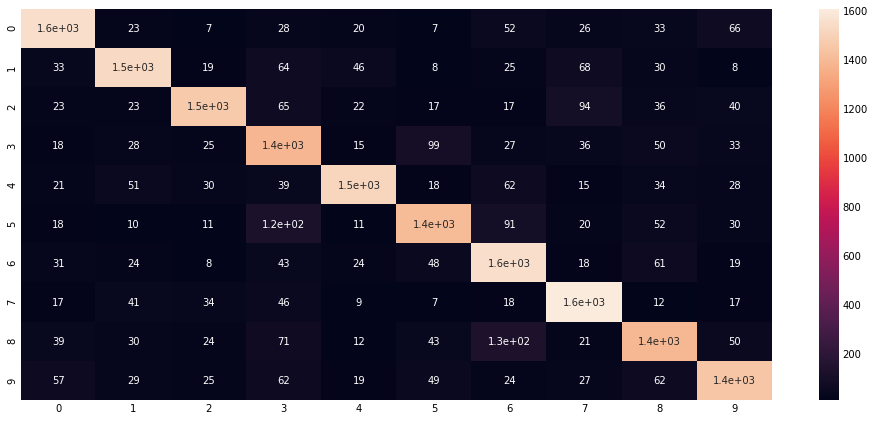

In [75]:
print('Visualizing the confusion matrix')
plt.figure(figsize = (15, 7.2))
sns.heatmap(confusion_matrix(y_test_o, predictions), annot = True)

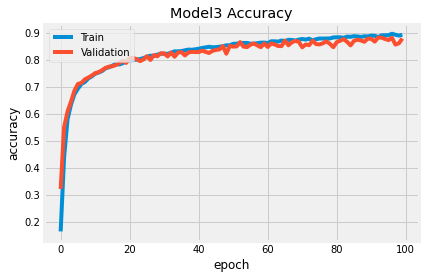

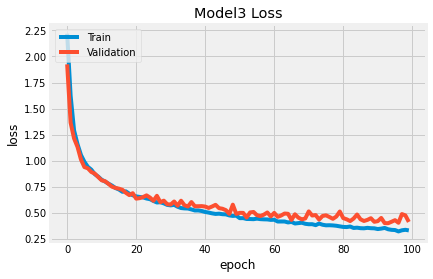

In [76]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model3 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model3 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

In [77]:
model3.predict_classes(X_test)[5]

9

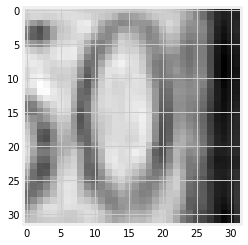

In [78]:
#Showing the image
plt.imshow(X_test[20].reshape(32, 32), cmap = 'gray')

In [79]:
model3.predict_classes(X_test)[20]

0

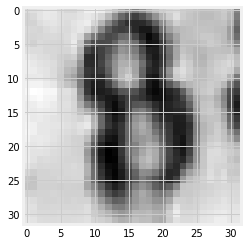

In [80]:
plt.imshow(X_test[10].reshape(32, 32), cmap = 'gray')

In [81]:
model3.predict_classes(X_test)[10]

8

### Conclusion
Evaluated and found that Neural Network with relu activations gives 76% accuracy. The final Neural Netowrk achieved best accuracy of 82% on validation set. Also printed the classification report, visualized the confusion matrix and summarized history for accuracy and loss.